# Lista 3: SEL0326 - Controle de Sistemas Lineares

## Questão 1: Pendulo Invertido

* $m \cdot \dot{\dot{x}}  = F \cdot sin(\phi) = F \cdot \phi$

com: $x(t) = \epsilon (t) + L \cdot \phi (t)$

Sendo, $\epsilon (t)$ a entrada u(t). $\phi (t)$ é a variável de saída.

In [199]:
import numpy as np
import control.matlab as matlab 
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")

In [200]:
F = 7
m = 3 
L = 2

A = np.array([[0, 1], [F/L, 0]])
B = np.array([[0], [m/L]])
C = np.array([[1, 0]])
D = np.array([[0]])

sys = matlab.ss(A, B, C, D)

print(sys)

<LinearIOSystem>: sys[24]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']
States (2): ['x[0]', 'x[1]']

A = [[0.  1. ]
     [3.5 0. ]]

B = [[0. ]
     [1.5]]

C = [[1. 0.]]

D = [[0.]]



[ 1.87082869 -1.87082869]


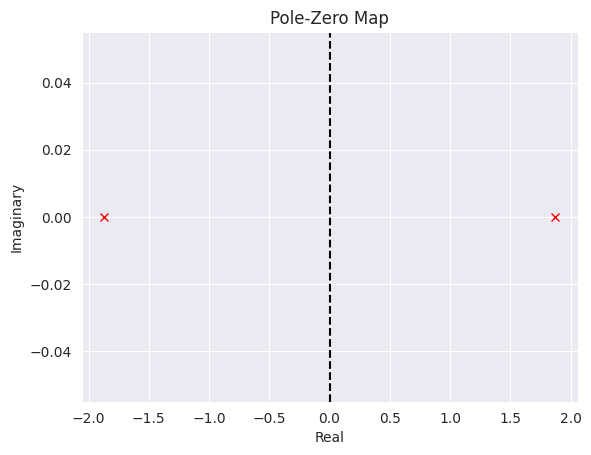

In [201]:
eigvals, eigenvectors = np.linalg.eig(A)
print(eigvals)
plt.plot(eigvals.real, eigvals.imag, 'rx')
plt.xlabel('Real')
plt.ylabel('Imaginary')
plt.title('Pole-Zero Map')
plt.axvline(x=0, color='k', linestyle='--')
plt.show()

In [202]:
# Define the desired poles

desired_poles = [-1 + 1j, -1 -1j]

# Compute the gains to place the poles
K = matlab.place(A, B, desired_poles)

# Print the gains
print(K)


[[3.66666667 1.33333333]]


In [203]:
print(f'Polo matematicamento alocado com k1={2*L/m:.2f} e k2={((L*5)/(m*4)+(F/m)):.2f}')

Polo matematicamento alocado com k1=1.33 e k2=3.17


## Questão 4: Helicóptero

A=[[-0.4   0.   -0.01]
 [ 1.    0.    0.  ]
 [-1.4   9.8  -0.02]]
B=[[6.3]
 [0. ]
 [9.8]]


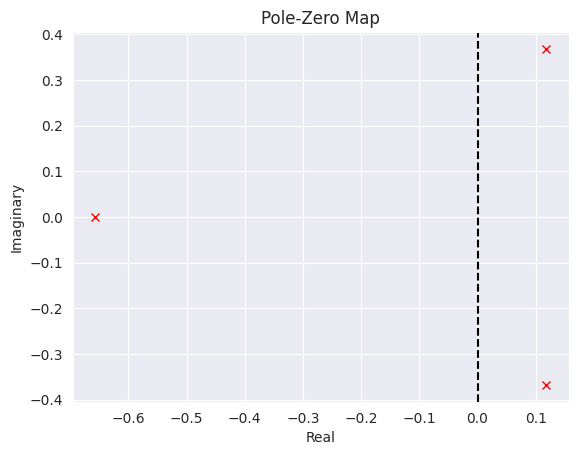

In [204]:
A = np.array([[-0.4, 0, -0.01], [1, 0, 0], [-1.4, 9.8, -0.02]])
B = np.array([[6.3], [0], [9.8]])

print(f'A={A}\nB={B}')

eigenvals, eigenvectors = np.linalg.eig(A)
eigenvals
plt.plot(eigenvals.real, eigenvals.imag, 'rx')
plt.xlabel('Real')
plt.ylabel('Imaginary')
plt.title('Pole-Zero Map')
plt.axvline(x=0, color='k', linestyle='--')
plt.show()

In [205]:
# controlability 
controlability_matrix = matlab.ctrb(A, B)
print(f'Controlability matrix: \n{controlability_matrix}')
print(f'Rank of controlability matrix: {np.linalg.matrix_rank(controlability_matrix)}')

Controlability matrix: 
[[ 6.3     -2.618    1.13736]
 [ 0.       6.3     -2.618  ]
 [ 9.8     -9.016   65.58552]]
Rank of controlability matrix: 3


In [206]:
A @ B 

array([[-2.618],
       [ 6.3  ],
       [-9.016]])

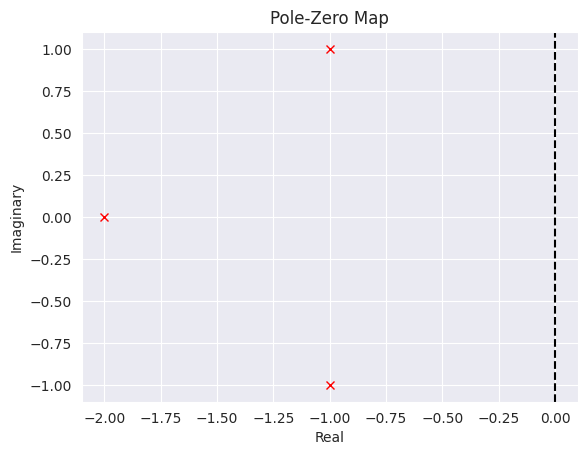

In [207]:
poles = [-2, -1 + 1j, -1 - 1j]

K = matlab.place(A, B, poles)

Acl = A - B @ K
eigenvals, eigenvectors = np.linalg.eig(Acl)

plt.plot(eigenvals.real, eigenvals.imag, 'rx')
plt.xlabel('Real')
plt.ylabel('Imaginary')
plt.title('Pole-Zero Map')
plt.axvline(x=0, color='k', linestyle='--')
plt.show()

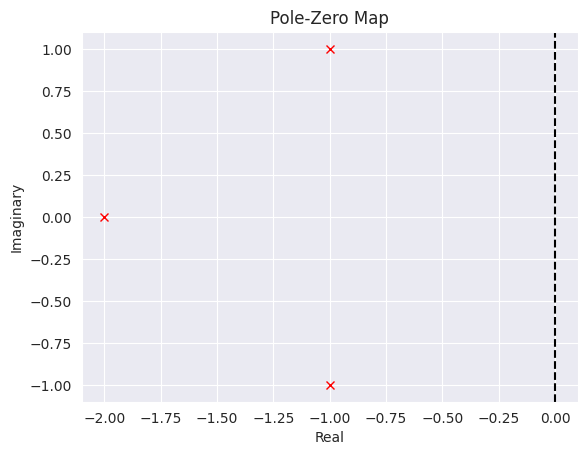

In [211]:
C = np.array([[0, 0, 1]])

poles = [-2, -1 + 1j, -1 - 1j] # mesmo acima

K = matlab.place(A.T, C.T, poles)

L = - K.T 
Acl_hat = A + L @ C

eigenvals, eigenvectors = np.linalg.eig(Acl_hat)
plt.plot(eigenvals.real, eigenvals.imag, 'rx')
plt.xlabel('Real')
plt.ylabel('Imaginary')
plt.title('Pole-Zero Map')
plt.axvline(x=0, color='k', linestyle='--')
plt.show()